<a href="https://colab.research.google.com/github/kumarnrj/StockPricePrediction/blob/master/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stock Price Prediction using (LSTM)**
 Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work.1 They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

In this model i have also used **Linear Regression** and **Random Forest** algorithms to check which one  will provide the better result.

In [3]:
#importing the important libraries 
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [15]:
#importing the datasets
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/prices.csv',index_col="date",parse_dates=True)

I have reduced the size of the data set due the processing speed of my sysetem.

In [16]:
 length = math.ceil(len(dataset)* 0.15)

In [17]:
length

127690

In [18]:
dataset = dataset[0:length]

In [19]:
#Printing the intial lines of the dataset 
dataset.head()


,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [20]:
dataset.tail()

,symbol,open,close,low,high,volume
date,,,,,,
2011-01-31,ROK,79.519997,81.010002,79.519997,81.260002,1558600.0
2011-01-31,ROP,78.120003,77.690002,77.260002,79.900002,1346200.0
2011-01-31,ROST,65.419998,65.199997,64.800003,65.699997,4788800.0
2011-01-31,RRC,47.740002,49.869999,47.740002,50.020000,2200700.0
2011-01-31,RSG,30.809999,30.840000,30.580000,31.049999,1449500.0


In [21]:
#Getting the information such as column name, Non-Null value, total count and the data type of the different columns 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127690 entries, 2016-01-05 to 2011-01-31
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  127690 non-null  object 
 1   open    127690 non-null  float64
 2   close   127690 non-null  float64
 3   low     127690 non-null  float64
 4   high    127690 non-null  float64
 5   volume  127690 non-null  float64
dtypes: float64(5), object(1)
memory usage: 6.8+ MB


In [22]:
# Getting the information about the mean, standard diviation and min and max value.
dataset.describe()

,open,close,low,high,volume
count,127690.000000,127690.000000,127690.000000,127690.000000,1.276900e+05
mean,49.083996,49.106783,48.509810,49.635983,7.146302e+06
std,49.153656,49.126233,48.599023,49.646150,1.689116e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,25.469999,25.480000,25.129999,25.780001,1.477525e+06
50%,39.480000,39.504999,39.000000,39.950001,3.132350e+06
75%,57.977500,58.020000,57.320000,58.607502,6.590400e+06
max,642.121105,639.631089,629.661103,642.961096,6.551166e+08


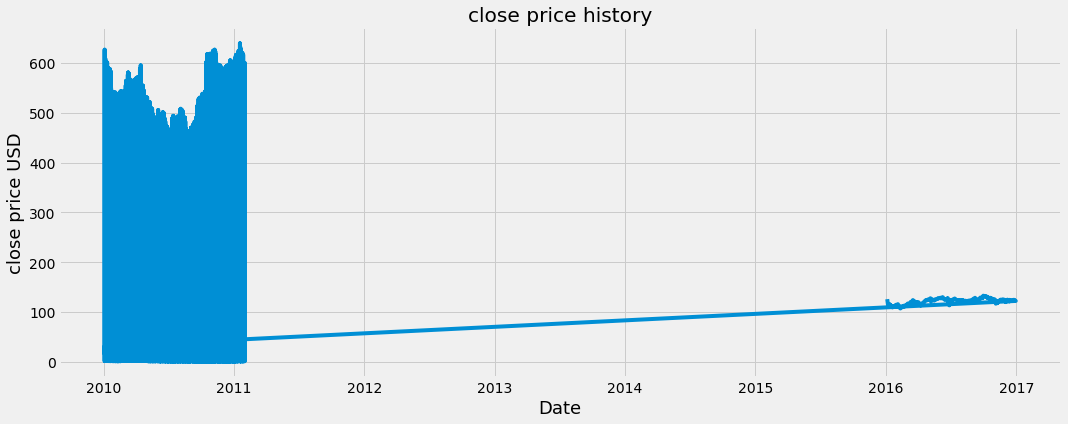

In [23]:
#visualizing the close price trend 
plt.figure(figsize=(16,6))
plt.title('close price history')
plt.plot(dataset['close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price USD',fontsize=18)
plt.show()

In [24]:
# Filtering the required data 
data = dataset.filter(['close'])

#converting  the dataframe into a array
dataset = data.values

# Calculating the number of the rows with 80% of the data 
training_data_len = math.ceil(len(dataset)* 0.8)

training_data_len

102152

Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. Scaling can make a difference between a weak machine learning model and a better one.

**Why do we need scaling?**

Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.
The machine learning algorithm works on numbers and does not know what that number represents. A weight of 10 grams and a price of 10 dollars represents completely two different things — which is a no brainer for humans, but for a model as a feature, it treats both as same.

In [25]:
#Scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.19565694],
       [0.18648308],
       [0.17860858],
       ...,
       [0.10072465],
       [0.07672545],
       [0.04693387]])

Spliting the dataset into Training and Testing Set is very important if we will not split the dataset then our model will train with the whole dataset and this cloud lead to the overfitting or underfitting. Therefore we split the 80% dataset for training and 20% for the testing of the data.

In [27]:
#Create the training data set
#Create the scaled trainig data set

train_data = scaled_data[0:training_data_len,:]

#Spilt the data set into x_train and y_train 
x_train = []
x_train1 =[]
y_train =[]
y_train1=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  x_train1.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  y_train1.append(train_data[i,0])
  if i <=60:
    print(x_train)
    print(y_train)
    print()

[array([0.19565694, 0.18648308, 0.17860858, 0.18122298, 0.1786399 ,
       0.17954789, 0.17532102, 0.17771624, 0.17482006, 0.17145422,
       0.16976348, 0.17085933, 0.17391206, 0.17104719, 0.17242484,
       0.17197084, 0.17489834, 0.17785714, 0.17790411, 0.17173601,
       0.17719963, 0.17979837, 0.17715266, 0.17267532, 0.17187691,
       0.16697687, 0.16636632, 0.16747783, 0.17206476, 0.17280055,
       0.17336414, 0.17137595, 0.17561847, 0.17381813, 0.17330152,
       0.17536798, 0.17516447, 0.17605681, 0.17948527, 0.18147346,
       0.18181787, 0.18211532, 0.18173959, 0.18136387, 0.18101946,
       0.18153608, 0.18748501, 0.18750065, 0.18761024, 0.1877981 ,
       0.19282338, 0.18850258, 0.18878437, 0.18881569, 0.18554377,
       0.18559075, 0.18451054, 0.18335207, 0.18454185, 0.18441662])]
[0.18640480455432762]



LSTM recieve the data in the form of the numpy array the array shoud be 3D Therefore we need to convert our dataframe into numppy array and then reshape the array using reshape() method of the  numpy.

In [ ]:
#Convert the x_train and y_train to numpy array
x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
#Reshape the data
#LSTM model require 3d data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(102092, 60, 1)

In [ ]:
#Build the LSTM model

model =Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Complie the model

model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

Epoch 1/1
102092/102092 [==============================] - 3756s 37ms/step - loss: 0.0047


In [28]:
#Create the testing dataset
#Create a new array contained scaled values from index 1543 to 2003

test_data = scaled_data[training_data_len-60:,:]
#Create the data sets x_test and y_test
x_test =[]
x_test1=[]
y_test = []
y_test1=[]
y_test = dataset[training_data_len:,:]
y_test1 = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  x_test1.append(test_data[i-60:i,0])


In [ ]:
x_test = np.array(x_test)

In [ ]:
#Reshape the data 
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Get the models pridicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

**Root Mean Square Error (RMSE)** is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.



In [ ]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

6.592272232560857

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


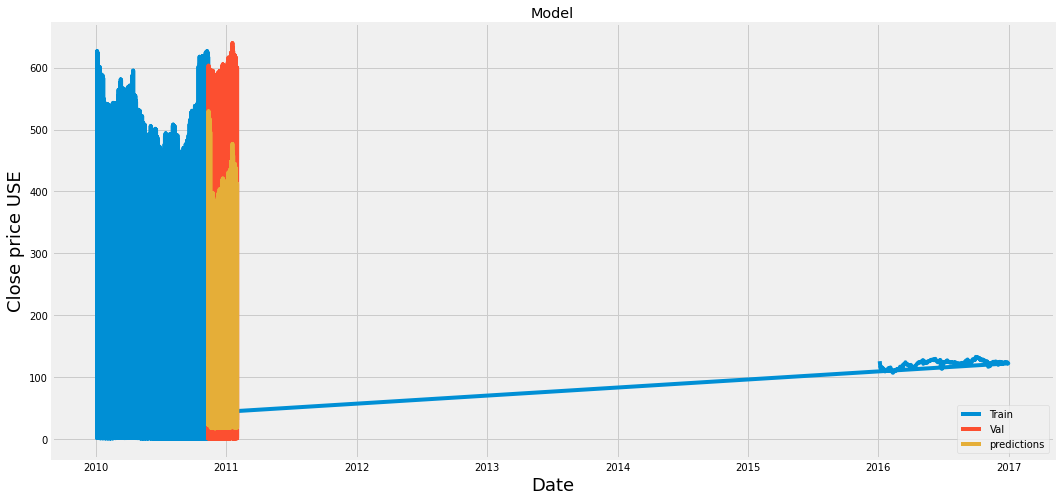

In [ ]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data 

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USE',fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show()

Since I have taken the dataset very small in which the data of 2010 and 2011 is more and due the insufficieny of data the graph display the above results

In [29]:
#Building the linear regression model 
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train1,y_train1)

#Predicting the Test set results
y_pred = regressor.predict(x_test1)

In [34]:
regressor.score(x_train1,y_train1)

0.16961636514024814

In [35]:
regressor.score(x_test1,y_test1)

-0.9792294694959206

Since the result is only 16% for training and -97% which is not acceptle. therefore choosing linear regession is not giving satisfacotory result.

In [37]:
#Buidling the Random Forest model

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

# Predicting a new result
y_pred = regressor.predict(x_test)

In [39]:
regressor.score(x_train,y_train)

0.998696229521159

In [40]:
regressor.score(x_test,y_test)

-0.9783411910164932

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


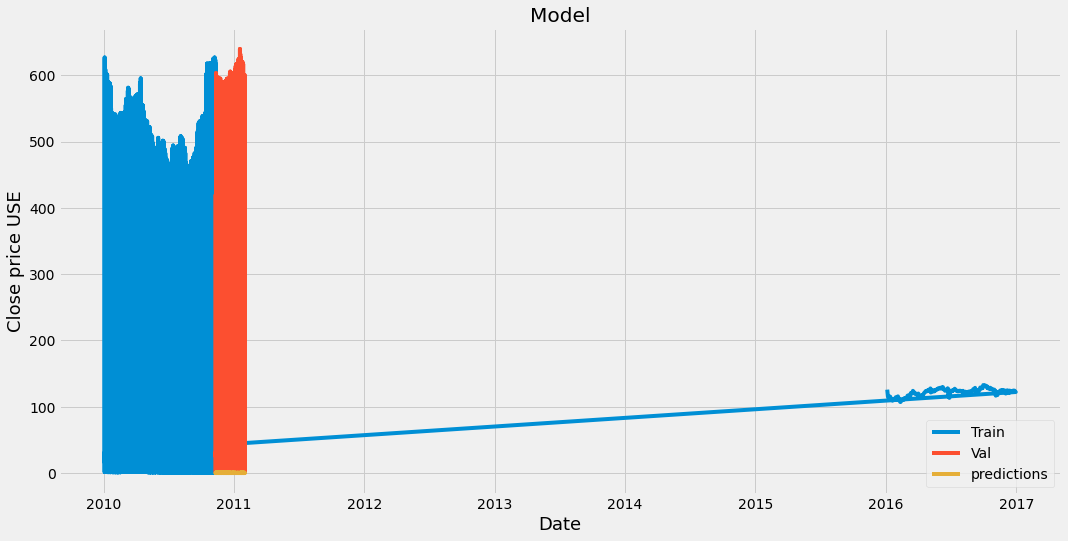

In [41]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = y_pred

#Visualize the data 

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USE',fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show()

**Using the Random Forest is not also providing the better result.**

**Commparing all the model LSTM perform the best out of all the 3 model.**